In [117]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import preprocessing

In [118]:
'''
Datos pertenecientes a Compresion del Concreto
'''
df = pd.read_excel('C:/Users/ASUS/Documents/Exam_1_Cuantitativo/Concrete_Data.xls', sheet_name='Sheet1')

In [119]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [120]:
df.columns = ['Cement', 'Slag', 'Fly_ash', 'Water', 'Superplasticizer', 'Coarse_aggregate', 'Fine_aggregate', 'Age', 'compressive']
df

,Cement,Slag,Fly_ash,Water,Superplasticizer,Coarse_aggregate,Fine_aggregate,Age,compressive
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [121]:
df.describe()

,Cement,Slag,Fly_ash,Water,Superplasticizer,Coarse_aggregate,Fine_aggregate,Age,compressive
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


<function matplotlib.pyplot.show(close=None, block=None)>

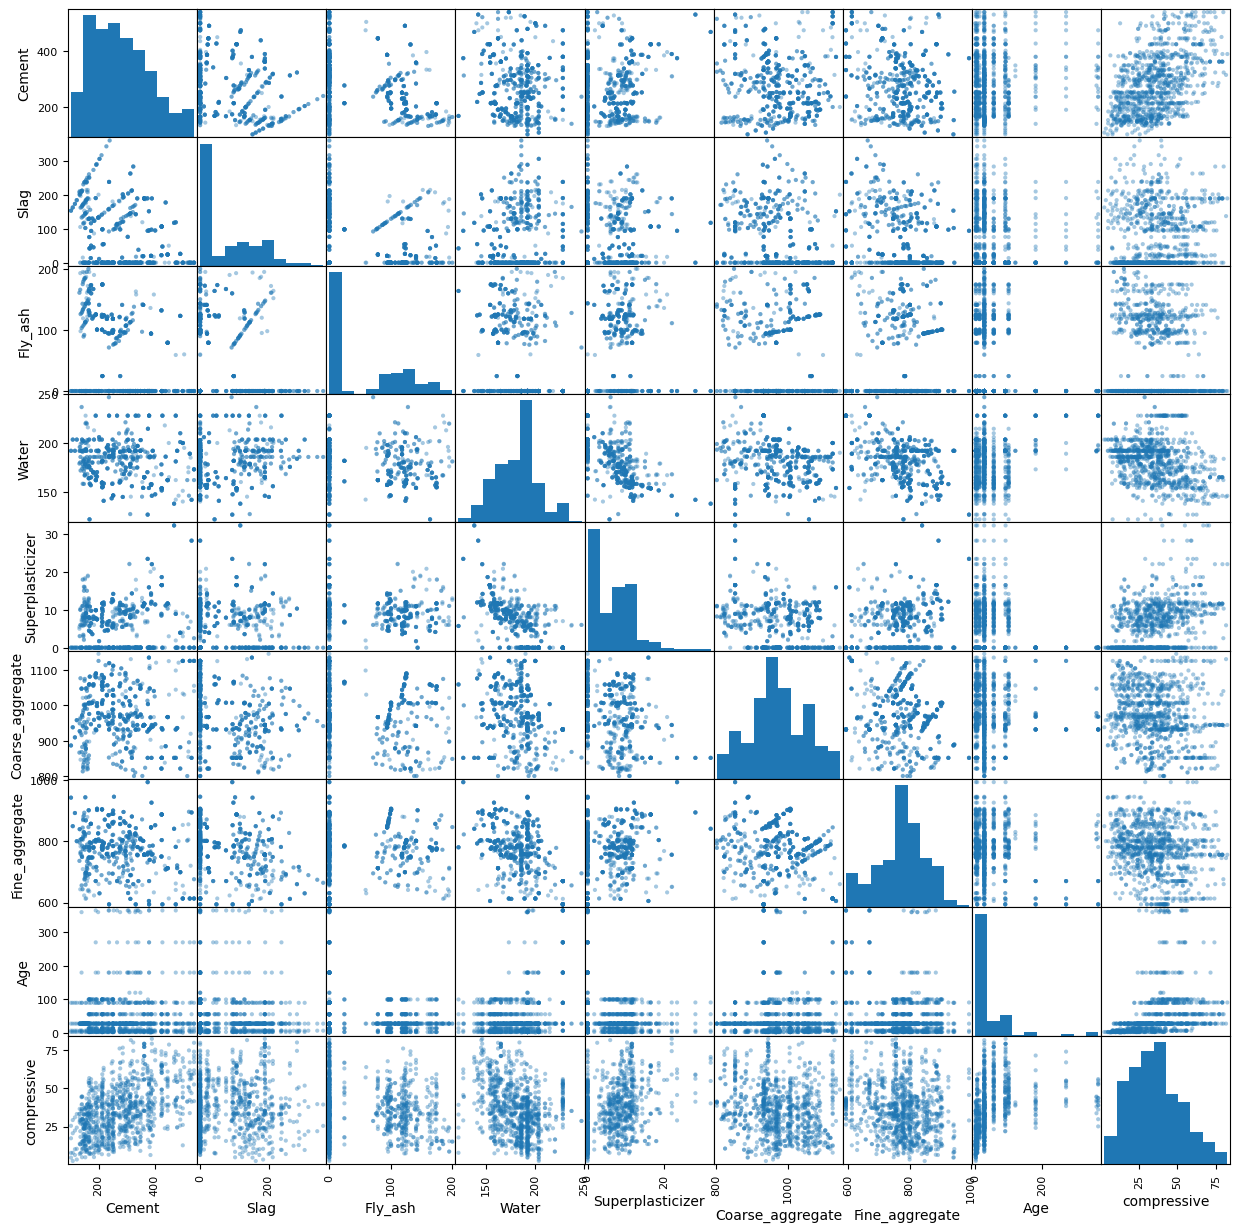

In [122]:
pd.plotting.scatter_matrix(df, alpha=0.4, figsize = (15, 15))
plt.show

<AxesSubplot:>

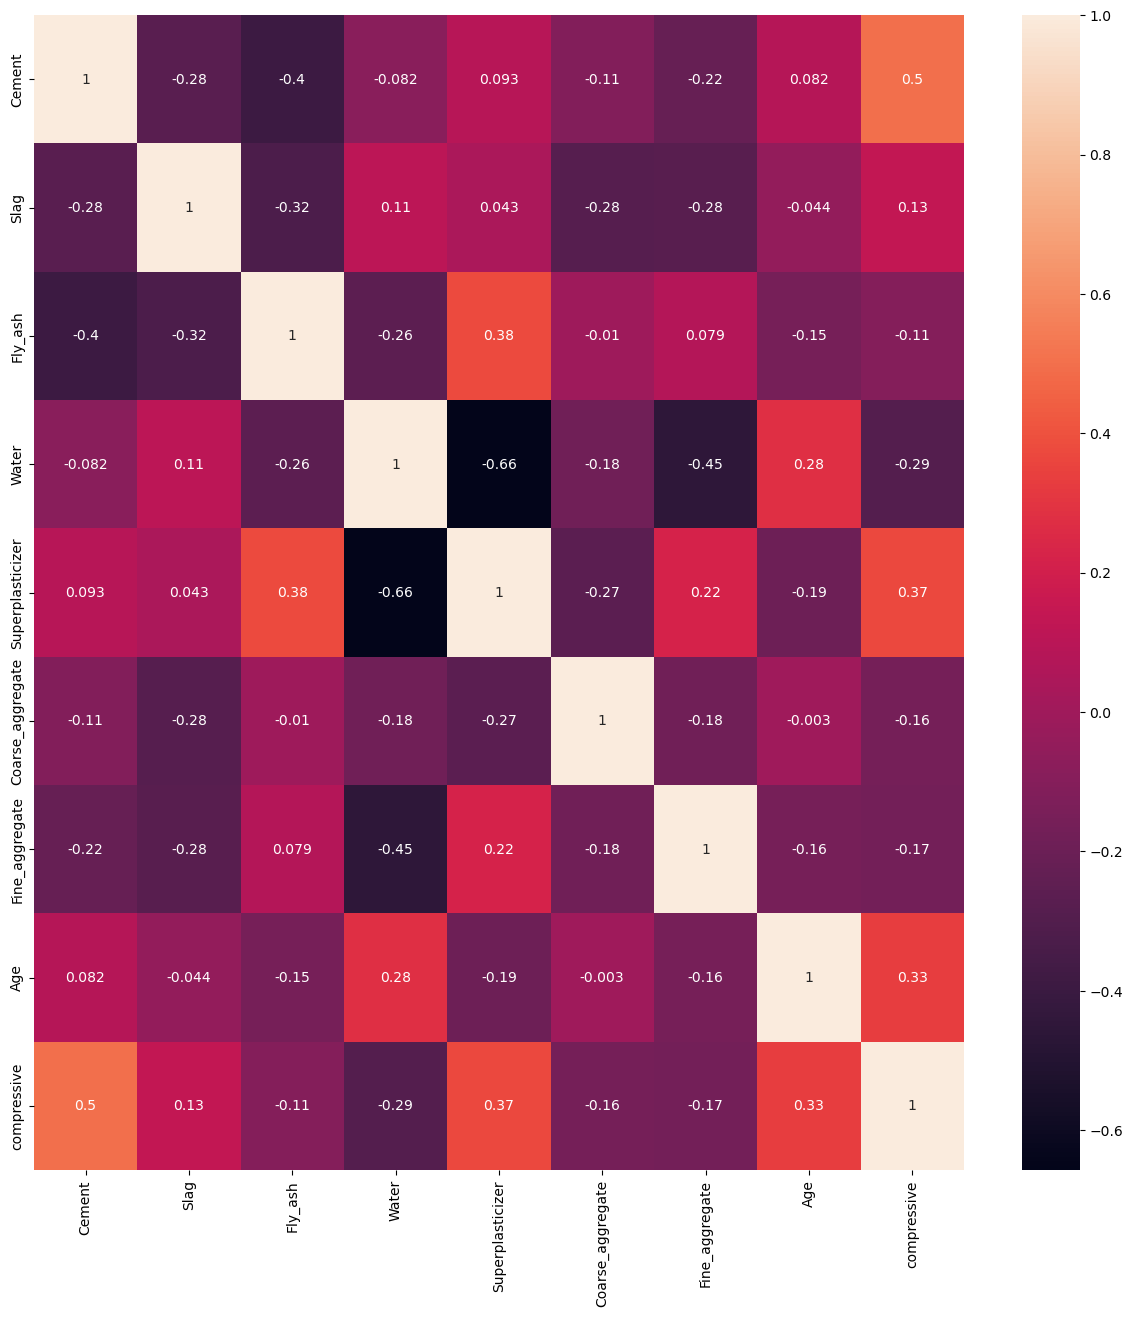

In [123]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True,  xticklabels=df.columns,
                yticklabels=df.columns)

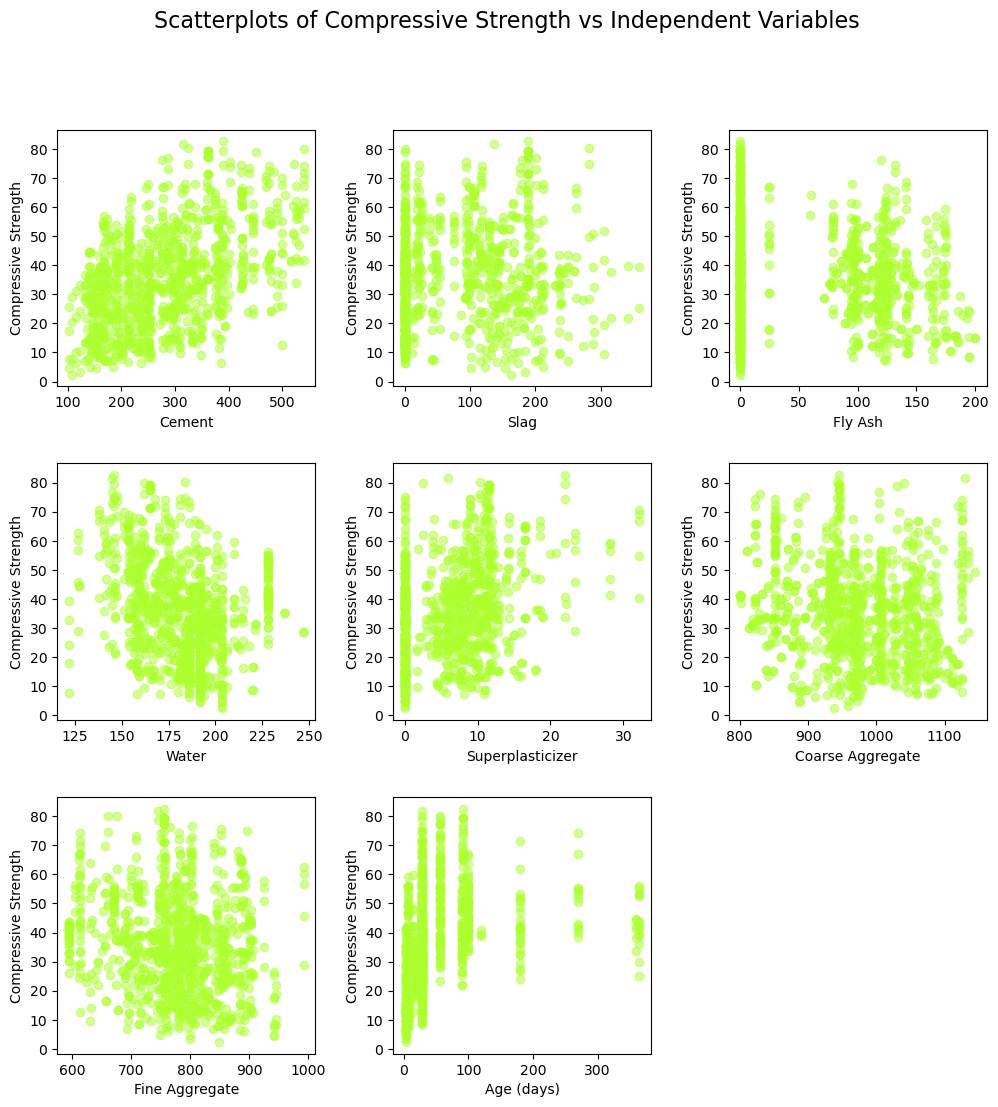

In [124]:
# create scatter plots in a 3x3 grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

# plot each scatter plot in a different subplot
axes[0,0].scatter(df['Cement'], df['compressive'], alpha = 0.5, color ='#ADFF2F')
axes[0,0].set_xlabel('Cement')
axes[0,0].set_ylabel('Compressive Strength')

axes[0,1].scatter(df['Slag'], df['compressive'], alpha = 0.5, color ='#ADFF2F')
axes[0,1].set_xlabel('Slag')
axes[0,1].set_ylabel('Compressive Strength')

axes[0,2].scatter(df['Fly_ash'], df['compressive'], alpha = 0.5, color ='#ADFF2F')
axes[0,2].set_xlabel('Fly Ash')
axes[0,2].set_ylabel('Compressive Strength')

axes[1,0].scatter(df['Water'], df['compressive'], alpha = 0.5, color ='#ADFF2F')
axes[1,0].set_xlabel('Water')
axes[1,0].set_ylabel('Compressive Strength')

axes[1,1].scatter(df['Superplasticizer'], df['compressive'], alpha = 0.5, color ='#ADFF2F')
axes[1,1].set_xlabel('Superplasticizer')
axes[1,1].set_ylabel('Compressive Strength')

axes[1,2].scatter(df['Coarse_aggregate'], df['compressive'], alpha = 0.5, color ='#ADFF2F')
axes[1,2].set_xlabel('Coarse Aggregate')
axes[1,2].set_ylabel('Compressive Strength')

axes[2,0].scatter(df['Fine_aggregate'], df['compressive'], alpha = 0.5, color ='#ADFF2F')
axes[2,0].set_xlabel('Fine Aggregate')
axes[2,0].set_ylabel('Compressive Strength')

axes[2,1].scatter(df['Age'], df['compressive'], alpha = 0.5, color ='#ADFF2F')
axes[2,1].set_xlabel('Age (days)')
axes[2,1].set_ylabel('Compressive Strength')

# hide the last subplot (bottom right)
axes[2,2].axis('off')

# add a title
fig.suptitle('Scatterplots of Compressive Strength vs Independent Variables', fontsize=16)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# show the plots
plt.show()

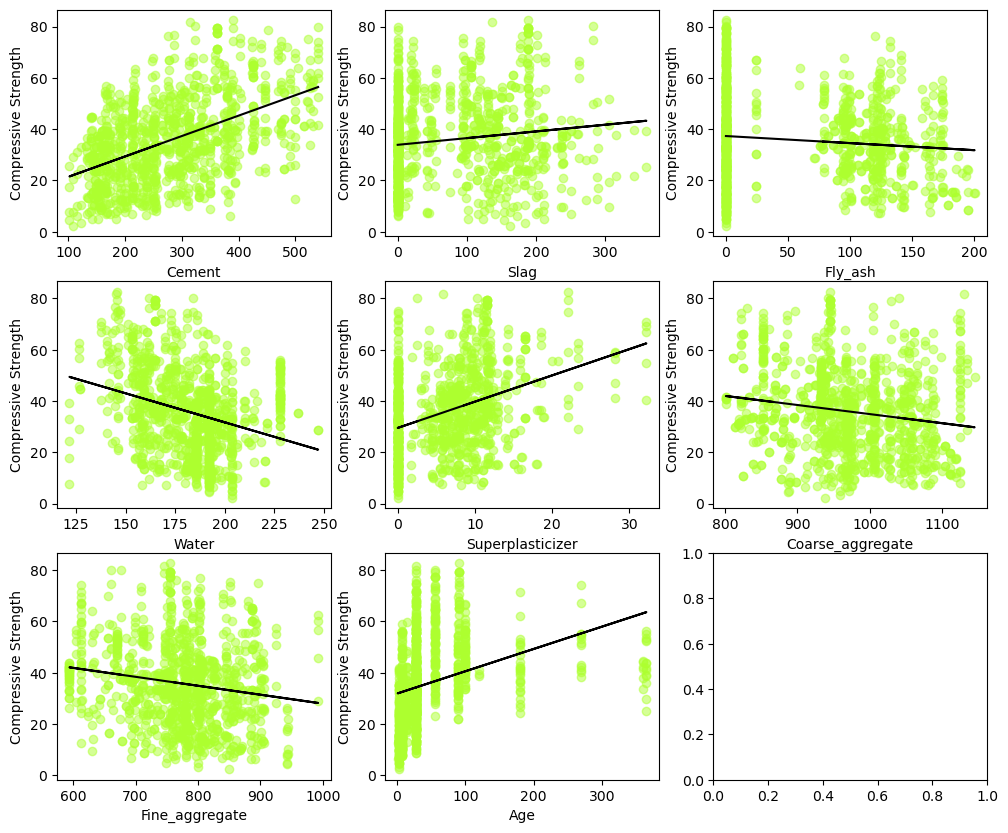

In [125]:
# creando subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# iterate sobre los subplotss
for i, ax in enumerate(axes.flatten()):
    if i == 8:
        break  # last subplot is empty
    x = df.iloc[:, i]
    y = df['compressive']
    ax.scatter(x, y, alpha=0.5, color='#ADFF2F')
    ax.set_xlabel(x.name)
    ax.set_ylabel('Compressive Strength')
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), color='black')

In [126]:
## to extract the column´s name in order to extract easely the names
df.columns

Index(['Cement', 'Slag', 'Fly_ash', 'Water', 'Superplasticizer',
       'Coarse_aggregate', 'Fine_aggregate', 'Age', 'compressive'],
      dtype='object')

In [127]:
X = sm.add_constant(df[['Cement', 'Slag', 'Fly_ash', 'Water', 'Superplasticizer',
       'Coarse_aggregate', 'Fine_aggregate', 'Age']])
model1 = sm.OLS(df['compressive'], X)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            compressive   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Fri, 12 May 2023   Prob (F-statistic):          6.76e-206
Time:                        15:49:31   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.1638     26.588  

In [128]:
from statsmodels.compat import lzip
### H0: E_i son homocedasticos 
### H1: E_i no son homocedasticos (Son heterosedasticos) 
test = sms.het_breuschpagan(results1.resid, results1.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Lagrange multiplier statistic', 137.16787737400614),
 ('p-value', 9.204945690607432e-26),
 ('f-value', 19.607325841244165),
 ('f p-value', 1.1361594104658914e-27)]

In [129]:
import scipy.stats as scp
scp.shapiro(results1.resid)

ShapiroResult(statistic=0.995323657989502, pvalue=0.0029942623805254698)

In [130]:
X2 = sm.add_constant(df[['Cement', 'Slag', 'Fly_ash', 'Water', 'Superplasticizer', 'Age']])
model2 = sm.OLS(df['compressive'], X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            compressive   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     271.2
Date:                Fri, 12 May 2023   Prob (F-statistic):          1.78e-207
Time:                        15:49:31   Log-Likelihood:                -3871.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1023   BIC:                             7791.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.0302      4.212  

In [131]:
X3 = sm.add_constant(df[['Cement', 'Slag', 'Fly_ash', 'Water', 'Age']])
model3 = sm.OLS(df['compressive'], X3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:            compressive   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     321.6
Date:                Fri, 12 May 2023   Prob (F-statistic):          4.98e-207
Time:                        15:49:31   Log-Likelihood:                -3875.0
No. Observations:                1030   AIC:                             7762.
Df Residuals:                    1024   BIC:                             7792.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8258      3.692      9.433      0.0

In [132]:
X4 = sm.add_constant(df[['Cement', 'Age', 'Water', 'Superplasticizer']])
model4 = sm.OLS(df['compressive'], X4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:            compressive   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     254.8
Date:                Fri, 12 May 2023   Prob (F-statistic):          5.65e-152
Time:                        15:49:31   Log-Likelihood:                -4005.7
No. Observations:                1030   AIC:                             8021.
Df Residuals:                    1025   BIC:                             8046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               32.0616      4.717  

Evaluando el modelo final 

In [133]:
from statsmodels.compat import lzip
### H0: E_i son homocedasticos 
### H1: E_i no son homocedasticos (Son heterosedasticos) 
test = sms.het_breuschpagan(results2.resid, results2.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Lagrange multiplier statistic', 139.1816225118868),
 ('p-value', 1.4915855798334411e-27),
 ('f-value', 26.638950472924364),
 ('f p-value', 1.3882212736893746e-29)]

In [134]:
import scipy.stats as scp
scp.shapiro(results2.resid)

ShapiroResult(statistic=0.9958420991897583, pvalue=0.007003553677350283)

In [135]:
####### Debemos proponer una solucion --- Box-cox

In [136]:
import numpy as np
from scipy.stats import boxcox
import statsmodels.api as sm

# Transformar la variable dependiente usando Box-Cox
y_transformed, lambda_optimal = boxcox(df['compressive'])
df['compressive_transformed'] = y_transformed

# Crear la matriz de variables explicativas y ajustar el modelo OLS
Xf = sm.add_constant(df[['Cement', 'Slag', 'Fly_ash', 'Water', 'Superplasticizer', 'Age']])
modelf = sm.OLS(df['compressive_transformed'], Xf)
resultsf = model.fit()

# Imprimir el resumen del modelo OLS
print(resultsf.summary())


                               OLS Regression Results                              
Dep. Variable:     compressive_transformed   R-squared:                       0.605
Model:                                 OLS   Adj. R-squared:                  0.603
Method:                      Least Squares   F-statistic:                     261.5
Date:                     Fri, 12 May 2023   Prob (F-statistic):          1.50e-202
Time:                             15:49:31   Log-Likelihood:                -2358.4
No. Observations:                     1030   AIC:                             4731.
Df Residuals:                         1023   BIC:                             4765.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [137]:

# Ajustar el modelo robusto
model_robust = sm.OLS(df['compressive_transformed'], Xf).fit(cov_type='HC3')

# Imprimir el resumen del modelo robusto
print(model_robust.summary())



                               OLS Regression Results                              
Dep. Variable:     compressive_transformed   R-squared:                       0.605
Model:                                 OLS   Adj. R-squared:                  0.603
Method:                      Least Squares   F-statistic:                     229.8
Date:                     Fri, 12 May 2023   Prob (F-statistic):          1.18e-185
Time:                             15:49:31   Log-Likelihood:                -2358.4
No. Observations:                     1030   AIC:                             4731.
Df Residuals:                         1023   BIC:                             4765.
Df Model:                                6                                         
Covariance Type:                       HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

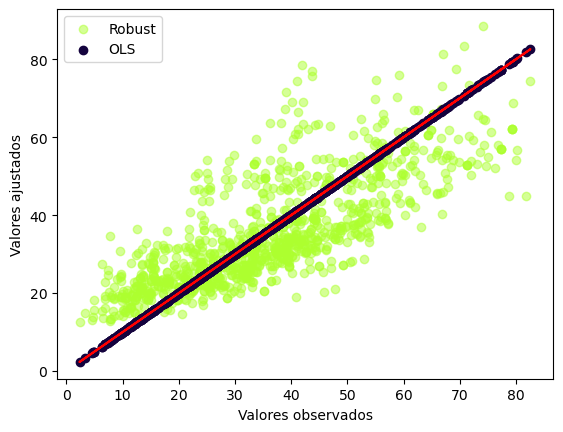

In [138]:
# Revertir la transformación Box-Cox para obtener los valores ajustados del modelo OLS y el modelo robusto
y_ols = np.power((lambda_optimal*y_transformed + 1), 1/lambda_optimal)
y_robust = np.power((lambda_optimal*model_robust.fittedvalues + 1), 1/lambda_optimal)

# Graficar los valores ajustados del modelo OLS y el modelo robusto contra los valores observados

plt.scatter(df['compressive'], y_robust, label='Robust', color ='#ADFF2F', alpha=.5)
plt.scatter(df['compressive'], y_ols, label='OLS', color ='#14033E')
plt.plot(df['compressive'], df['compressive'], color='red', linestyle='-')
plt.xlabel('Valores observados')
plt.ylabel('Valores ajustados')
plt.legend()
plt.show()

In [139]:
import numpy as np

# Definimos los valores máximos y mínimos para cada variable independiente
cement_min, cement_max = df['Cement'].min(), df['Cement'].max()
slag_min, slag_max = df['Slag'].min(), df['Slag'].max()
fly_ash_min, fly_ash_max = df['Fly_ash'].min(), df['Fly_ash'].max()
water_min, water_max = df['Water'].min(), df['Water'].max()
superplasticizer_min, superplasticizer_max = df['Superplasticizer'].min(), df['Superplasticizer'].max()
age_min, age_max = df['Age'].min(), df['Age'].max()

# Generamos un conjunto aleatorio de valores para cada variable independiente
n = 10 # número de valores aleatorios que queremos generar
cement = np.random.uniform(cement_min, cement_max, n)
slag = np.random.uniform(slag_min, slag_max, n)
fly_ash = np.random.uniform(fly_ash_min, fly_ash_max, n)
water = np.random.uniform(water_min, water_max, n)
superplasticizer = np.random.uniform(superplasticizer_min, superplasticizer_max, n)
age = np.random.uniform(age_min, age_max, n)

# Creamos un arreglo con los valores aleatorios generados
X_new = np.column_stack((np.ones(n), cement, slag, fly_ash, water, superplasticizer, age))


In [140]:
X_new_visual = pd.DataFrame(X_new, columns=['const', 'Cement', 'Slag', 'Fly_ash', 'Water', 'Superplasticizer', 'Age'])
X_new_visual.head(10)

,const,Cement,Slag,Fly_ash,Water,Superplasticizer,Age
0,1.0,262.031672,203.155486,91.964314,207.661756,1.324052,35.255495
1,1.0,368.581806,37.205125,186.710770,143.129884,25.056193,192.197504
2,1.0,448.220828,170.498016,116.827609,199.055505,25.646559,359.339901
3,1.0,309.418592,301.244313,88.378525,168.439703,24.167717,80.046651
4,1.0,477.205655,245.797308,192.297690,176.701564,31.524023,211.897173
5,1.0,341.834892,159.488240,146.637724,150.262219,12.241177,294.509245
6,1.0,188.834362,108.099766,109.562200,167.888769,13.880229,114.230987
7,1.0,237.416280,283.087708,47.202242,232.162561,24.714138,58.134269
8,1.0,336.363089,152.541291,125.982266,163.434953,26.936597,200.630326
9,1.0,343.037814,69.208351,55.238133,185.938498,30.813532,118.045954


In [141]:
# Hacemos la predicción usando el modelo entrenado
y_pred = results.predict(X_new)

# Imprimimos los valores de la predicción
print(y_pred)

[12.57349426 21.94093812 27.15428385 19.7975143  28.06419709 24.66416513
 13.85368096 13.53920409 21.76568306 16.08805167]


In [142]:
# Creamos un dataframe con los valores de la predicción
df_pred = pd.DataFrame({'Predicción': y_pred})

# Imprimimos el dataframe
df_pred

,Predicción
0,12.573494
1,21.940938
2,27.154284
3,19.797514
4,28.064197
5,24.664165
6,13.853681
7,13.539204
8,21.765683
9,16.088052


In [144]:
# scatter plot
#fig, axes = plt.subplots(1, 1, figsize=(8, 6))
#axes.scatter(df['Cement'], df['compressive'], alpha=0.5, color='#ADFF2F')
#axes.set_xlabel('Cement')
#axes.set_ylabel('Compressive Strength')

# regression line
#z = np.polyfit(df['Cement'], df['compressive'], 1)
#p = np.poly1d(z)
#axes.plot(df['Cement'], p(df['Cement']), color='black')
